# **Project for PFDA - Bank Transaction Dataset for Fraud Detection**
___

![Bank Transactions](images/bank%20transactions.jpg)

## **Dataset Overview:**

This notebook contains my analysis of a dataset of bank transactions. 

### **Dataset Details:**
- **Source:** [Bank Transactions for Fraud Detection](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data)
- **Number of Records:** XXXX
- **Number of Features:** XXXX - full details of features can be found in the README.md file. 

### **Objectives:**
1. Analyse the dataset as a whole, identifying trends and patterns across different features, including: 
    - **Age Groups**: Examining transaction behvaiours based on customer age. 
    - **Occupations**: Identifying trends tied to professions. 
    - **Times of Day**: Exploring transaction activity across time intervals. 
    - **Other Features:** Investigating patterns in device usage, account balances, and login attempts. 
2. Develop hypothese to identify characteristics of potentially fraudulent transactions through exploratory analysis. 
3. Use machine learning to investigate patterns and attempt to predict potentially fraudueltn transactions, even without explicit fraud labels. 
4. Present findings in a structured manner, incorporating visualisations, statistical insights, and key takeaways. 

**Author: Brianne McGrath**

___


## **Imports**
___

In [232]:
#import necessary libraries 

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## **Loading Data & Initial Inspection**
___

Load the Bank Transaction dataset.

In [233]:
#loading dataset
df = pd.read_csv('data/bank_transactions_data_2.csv')

In [234]:
#reviewing first few rows of dataset
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [235]:
#checking a random sample of dataset
df.sample(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
2000,TX002001,AC00456,3.85,2023-04-17 16:27:27,Debit,San Jose,D000058,72.192.101.196,M025,ATM,29,Doctor,32,1,10506.41,2024-11-04 08:08:51
78,TX000079,AC00464,120.29,2023-12-18 18:46:27,Debit,Miami,D000561,162.198.218.92,M045,Branch,19,Student,77,1,1362.39,2024-11-04 08:06:50
2505,TX002506,AC00377,577.12,2023-01-27 17:38:07,Debit,Virginia Beach,D000110,120.16.186.17,M075,ATM,39,Engineer,69,1,5265.88,2024-11-04 08:10:50
1451,TX001452,AC00460,26.50,2023-02-08 16:42:59,Debit,Indianapolis,D000175,9.230.41.239,M063,Online,48,Engineer,179,1,4854.83,2024-11-04 08:07:24
2168,TX002169,AC00460,431.08,2023-07-17 18:24:15,Debit,Albuquerque,D000339,145.179.219.57,M013,Branch,59,Retired,25,1,6760.22,2024-11-04 08:06:52


In [236]:
df.shape

(2512, 16)

In [237]:
#displaying information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [238]:
#changing data type from object to datetime for TransactionDate and PreviousTransactionDate
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%Y-%m-%d %H:%M:%S')
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], format='%Y-%m-%d %H:%M:%S')

In [239]:
#checking changes have been made 
df.dtypes

TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                    object
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                            object
CustomerAge                         int64
CustomerOccupation                 object
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
dtype: object

In [240]:
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,NaN,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,NaN
top,TX000001,AC00362,NaN,NaN,Debit,Fort Worth,D000697,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,NaN
freq,1,12,NaN,NaN,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,NaN
mean,NaN,NaN,297.593778,2023-07-05 20:32:10.826433024,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,NaN,NaN,0.260000,2023-01-02 16:00:06,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,NaN,NaN,81.885000,2023-04-03 16:22:05.750000128,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,NaN,NaN,211.140000,2023-07-07 17:49:43.500000,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,NaN,NaN,414.527500,2023-10-06 18:40:53.500000,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,NaN,NaN,1919.110000,2024-01-01 18:21:50,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,300.000000,5.000000,14977.990000,2024-11-04 08:12:23


In [241]:
#checking unique values
df.nunique()

TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64

In [242]:
# checking for null values 
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [243]:
#checking for missing values 
df.isna().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [244]:
#checking for duplicated values 
df.duplicated().sum()

0

## **Data Analysis and Visualisation:**
___

### **Distribution of Transaction Amounts:**
We begin by examing the distribution of transaction amounts to understand how customers typically spend. This can help identify patterns like unusually high or low transactions, which could indicate anomalies. 

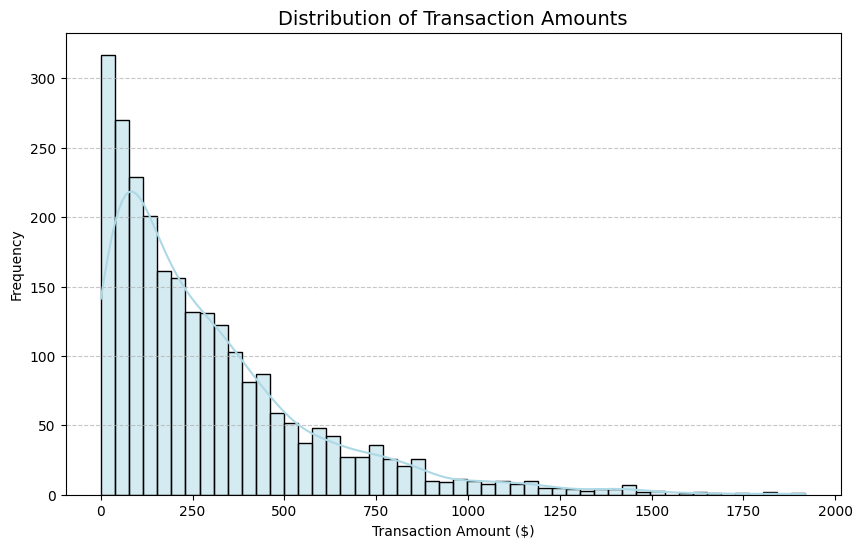

In [245]:
#plotting
plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionAmount'], bins=50, kde=True, color='lightblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Distribution of Transaction Amounts', fontsize=14)
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.show()


- **Skewed Distribution:** The graph shows a **right-skewed distribution**, where most transaction amounts are small (e.g., under $250). This seems typical for a real-world situation, as smaller transactions are generally more common than larger ones. 
- **Low Frequency of Large Transactions:** Transactions above $1,000 are much less frequent, suggesting that high-value transactions are rare. 
- **Potential Outliers:** While the plot doesn't show specific points, the tail of the distribution indicates potential outliers (e.g., transactions closer to $2,000 - although this is hard to read). We will analyse these further to check if they are genuine or fraudulent. 

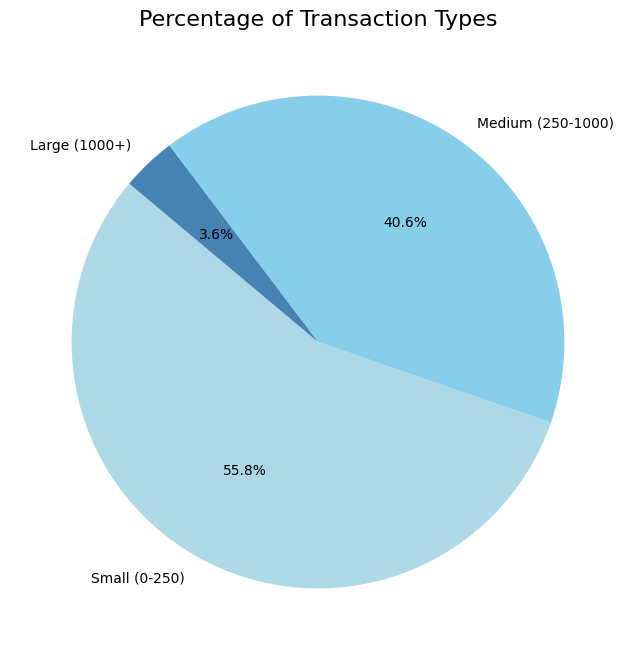

In [246]:
#categorising transactions based on their amounts
bins = [0, 250, 1000, df['TransactionAmount'].max()]
labels = ['Small (0-250)', 'Medium (250-1000)', 'Large (1000+)']
df['TransactionType'] = pd.cut(df['TransactionAmount'], bins=bins, labels=labels, include_lowest=True)

#calculating the percentage of each category
transaction_counts = df['TransactionType'].value_counts(normalize=True) * 100

#plotting
plt.figure(figsize=(8, 8))
plt.pie(
    transaction_counts, 
    labels=transaction_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['#ADD8E6', '#87CEEB', '#4682B4']  
)
plt.title('Percentage of Transaction Types', fontsize=16)
plt.show()


- **Small Transactions ($0-$250):** Majority of the transactions, making up 55.8% of the total. Indicates most of the transactions are low-value, possible for day-to-day, expenses or minor purchases. 
- **Medium Transactions ($250-$1000):** Represent 40.6% of transactions. Could correspond to larger purchases or payments, such as bills or luxury goods. 
- **Large Transactions ($1000+):** Account for only 3.6% of transactions. Relatively rare and likely represent major purchases or high-value transfers. 

Small and medium transactions dominate the dataset, together accounting for over 96% of all transactions. Large transactions are rare, which may make them potentially more interesting for fraud analysis, as they could stand out as anomalies. 
___

## **Customer Age Group Analysis:**
To examine trends by customer age group, we'll first define age categories, calculate relevant statistics, and visualise them. 

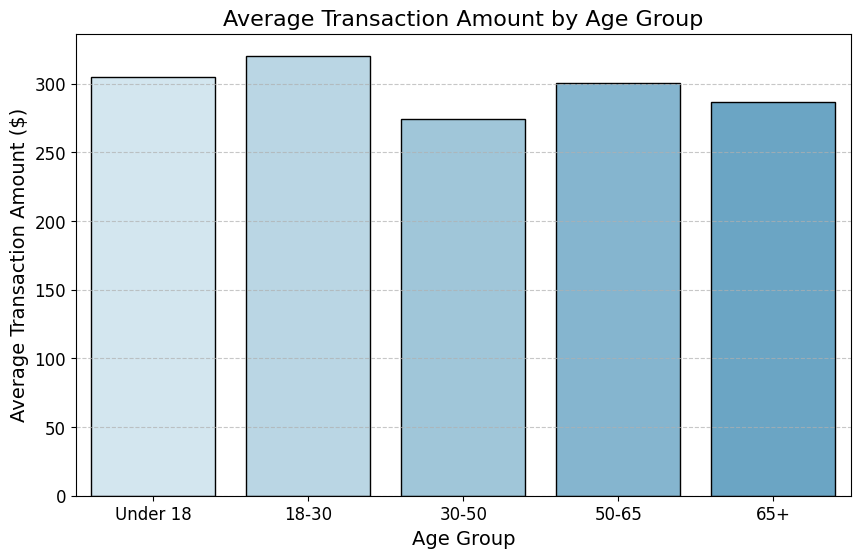

Summary of Transaction Trends by Age Group:
          Average Transaction Amount ($)  Number of Transactions
AgeGroup                                                        
Under 18                      304.717321                      56
18-30                         320.337274                     741
30-50                         273.986536                     638
50-65                         300.128183                     710
65+                           286.722234                     367


In [247]:
#defining age groups
bins = [0, 18, 30, 50, 65, 100]
labels = ['Under 18', '18-30', '30-50', '50-65', '65+']
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels, include_lowest=True)

#calculating average transaction amounts per age group
age_group_stats = df.groupby('AgeGroup')['TransactionAmount'].agg(['mean', 'count'])

#creating a custom colour palette
colours = ['#cfe8f3', '#b3d8eb', '#96c9e3', '#79b9db', '#5caad3']

#plotting 
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_stats.index, y=age_group_stats['mean'], palette=colours, edgecolor='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Average Transaction Amount by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Transaction Amount ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# printing summary table
print("Summary of Transaction Trends by Age Group:")
print(age_group_stats.rename(columns={'mean': 'Average Transaction Amount ($)', 'count': 'Number of Transactions'}))


- **Highest Spenders:** Customers aged **18-30** have the highest average transaction amounts, reflecting more significant purchasing activity. 
- **Stable Older Spending:** **50-65** and **65+** groups show similar spending patterns. 
- **Middle Age Drop:** **30-50** spends less than younger and older groups, potentially due to financial constraints. 
- **Younger Spending: Under 18** spending is similar to older groups, potentially influenced by parental purchases.  

### **Transaction Types by Age Group:**

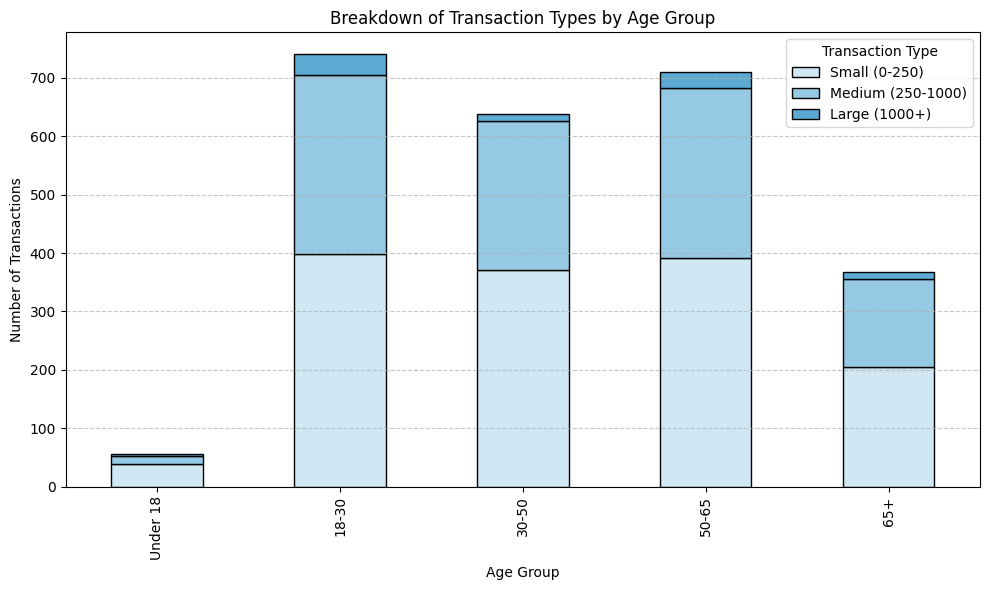

In [248]:
#prepare the data for the stacked bar chart
age_transaction_types = df.groupby(['AgeGroup', 'TransactionType']).size().unstack(fill_value=0)

#creating a custom colour palette
colors = ['#cfe8f3', '#96c9e3', '#5caad3']

#plotting
age_transaction_types.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=colors,
    edgecolor='black'
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Breakdown of Transaction Types by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Transactions')
plt.legend(title='Transaction Type')
plt.tight_layout()
plt.show()


- **18-30** has the highest transaction volume, mainly **small**, with significant **medium** transactions. 
- **30-50** and **50-65** groups also have a majority of **small** transactions, but **medium** and **large** transactions are more prevelant compared to the younger and older groups. 
- **Under 18** and **65+** groups have fewer transactions, mostly **small**. 

The chart highlights that most transactions across all groups are **small**, with **medium** and **large** transactions being less common, particularly for younger and older customers. 

___ 

## **References:**

### **Visualisation:**
- https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html (Stacked Bar Charts)
- https://seaborn.pydata.org/generated/seaborn.barplot.html (Bar Plots)


### **END**